# ***IMPORTING THE IMPORTANT LIBRARIES AND  LOADING THE DATASET***

In [1]:
import pandas as pd

In [2]:
# Load the dataset from the provided path
file_path = 'UNSW_NB15.csv'
data = pd.read_csv(file_path)

In [3]:
# Display the first few rows to understand the structure of the dataset
data.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


In [4]:
data.tail()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
82327,82328,0.000005,udp,-,INT,2,0,104,0,200000.005100,...,1,2,0,0,0,2,1,0,Normal,0
82328,82329,1.106101,tcp,-,FIN,20,8,18062,354,24.410067,...,1,1,0,0,0,3,2,0,Normal,0
82329,82330,0.000000,arp,-,INT,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,Normal,0
82330,82331,0.000000,arp,-,INT,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,Normal,0
82331,82332,0.000009,udp,-,INT,2,0,104,0,111111.107200,...,1,1,0,0,0,1,1,0,Normal,0


### ***PERFORMING THE EXPLORATOTARY DATA ANALYSIS***

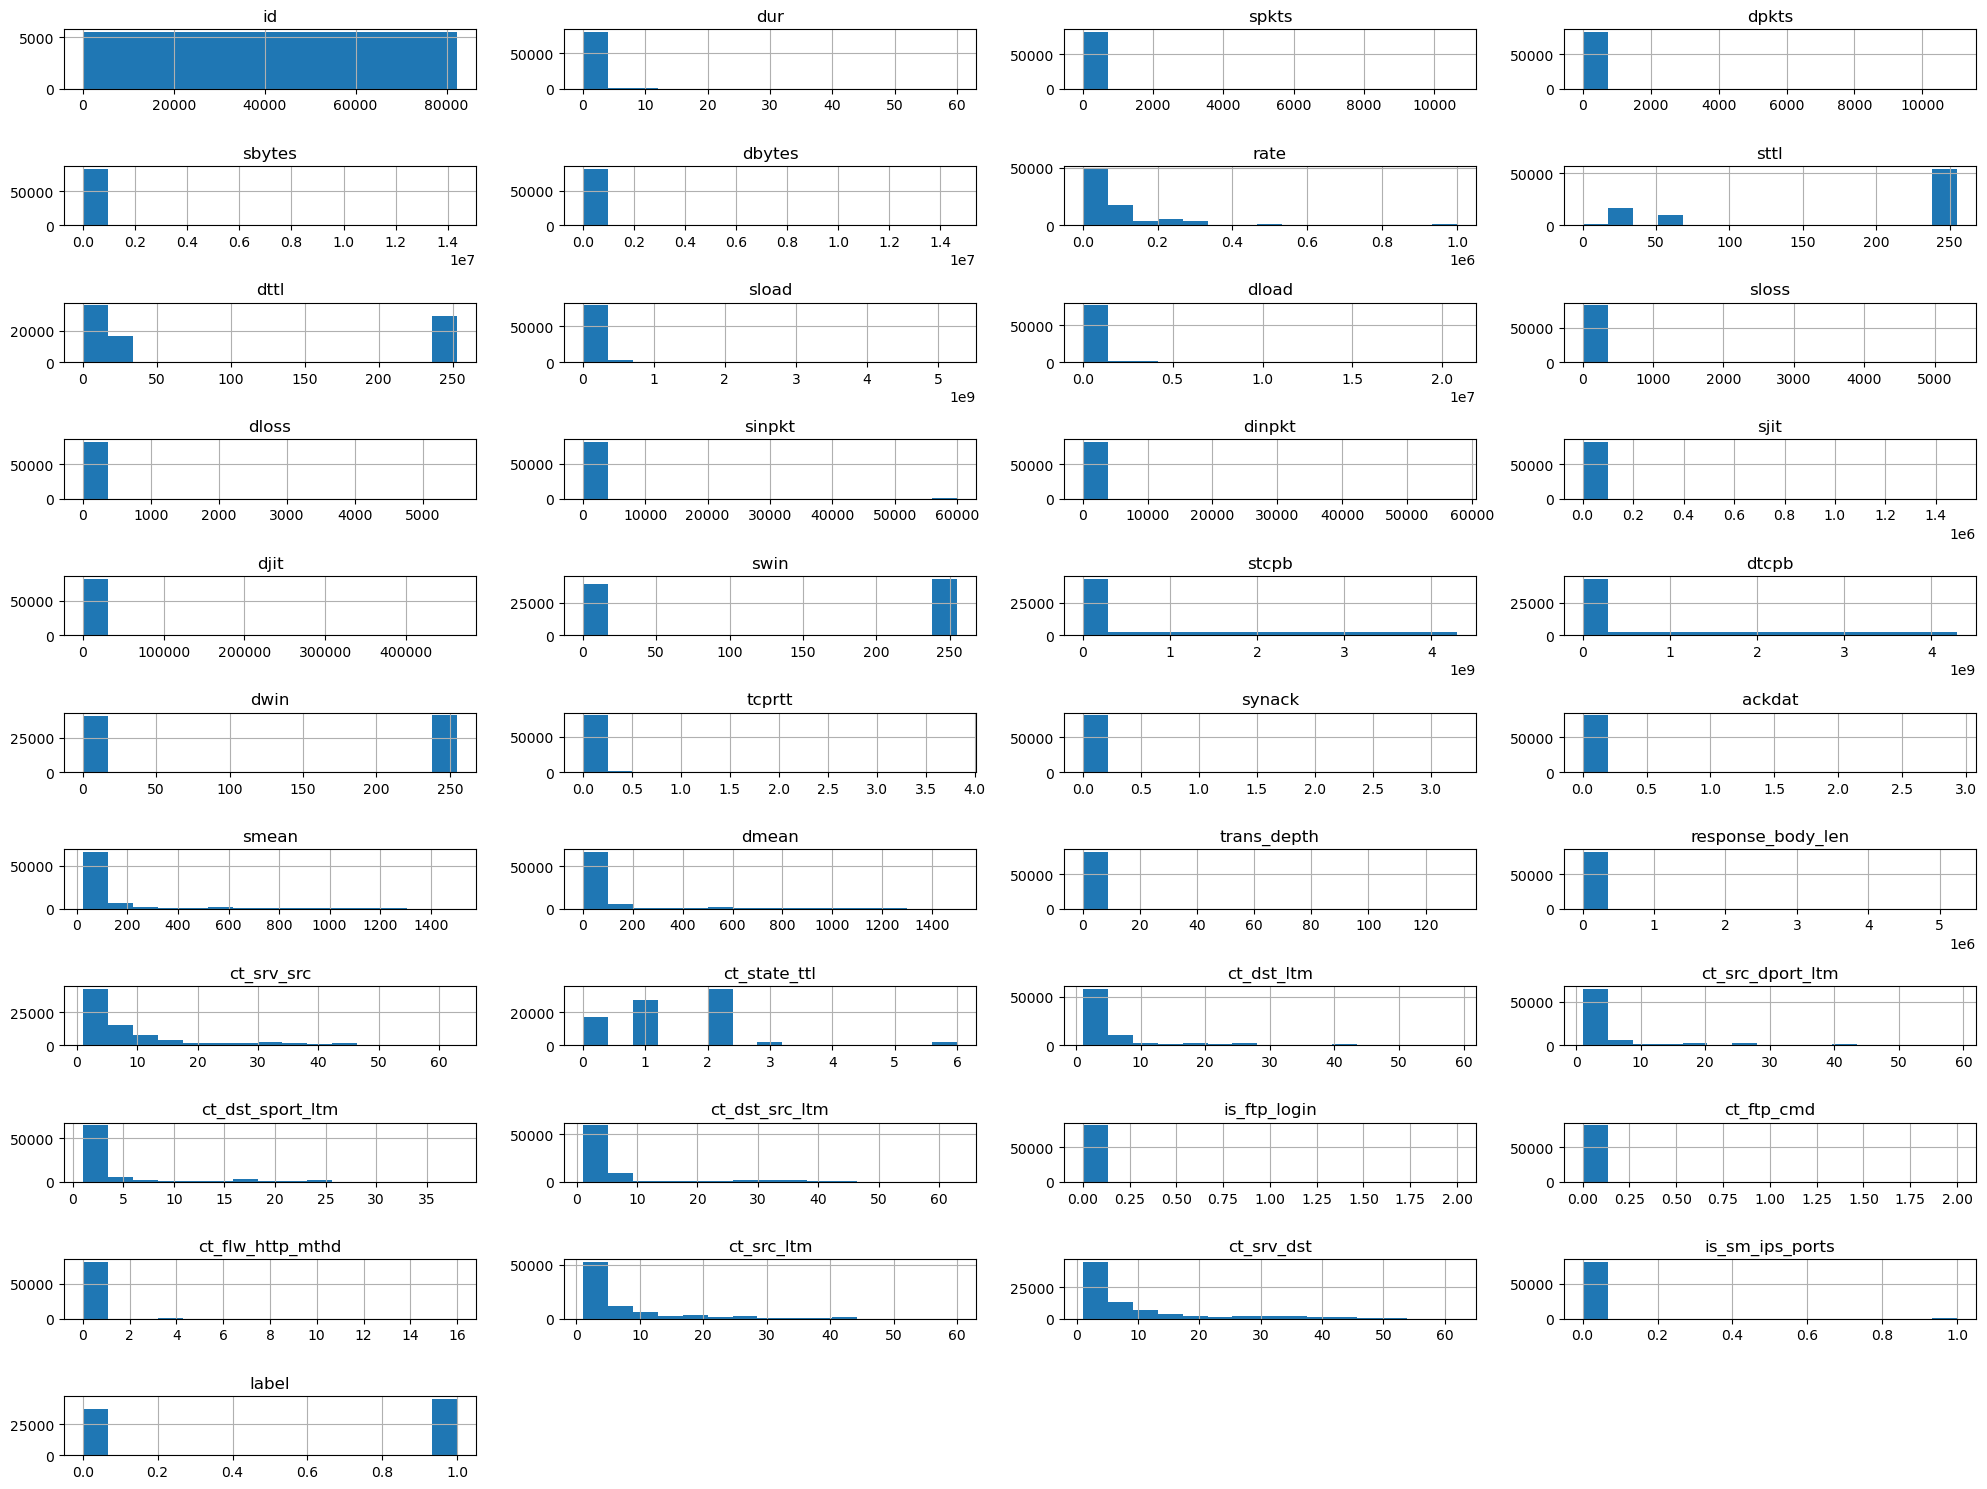

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Adjusting the layout for histograms based on the number of numerical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Plot histograms with an adjusted layout
data[numerical_columns].hist(bins=15, figsize=(20, 15), layout=(11, 4))
plt.tight_layout()
plt.show()



Histogram Plot for Numerical Features
This plot shows the distribution of various numerical features in the dataset. Each subplot represents the frequency distribution of a feature.

Features like id, spkts, dpkts, sbytes, and dbytes are shown with their respective histograms.

The plot reveals that several features are highly skewed, with most values concentrated on the lower end. For instance, sbytes and dbytes have a long tail of larger values but most of the data is clustered around smaller values.

Features like dur (duration), rate, and sload are highly concentrated near zero, indicating that most network connections in the dataset have small duration and low rates.

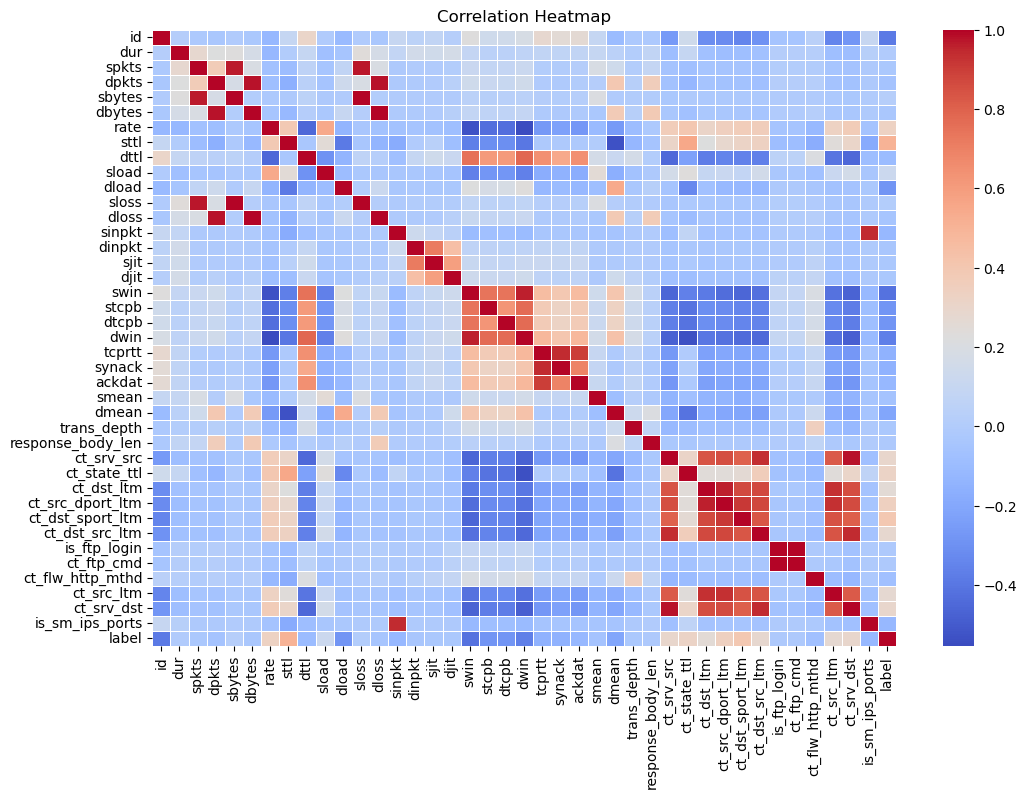

In [6]:
# 2. Correlation heatmap for numerical columns
plt.figure(figsize=(12, 8))
correlation_matrix = data[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()



Correlation Heatmap
The heatmap displays the correlation between various features.

Strong positive correlations (closer to 1) are marked in red, and strong negative correlations (closer to -1) are in blue.

Highly correlated features, such as spkts (source packets) and sbytes (source bytes) show a strong positive correlation, which makes sense since the number of packets should relate to the bytes sent.

dpkts (destination packets) and dbytes (destination bytes) are similarly strongly correlated.

The heatmap helps identify redundant features, which may contain overlapping information that could be addressed during feature selection.

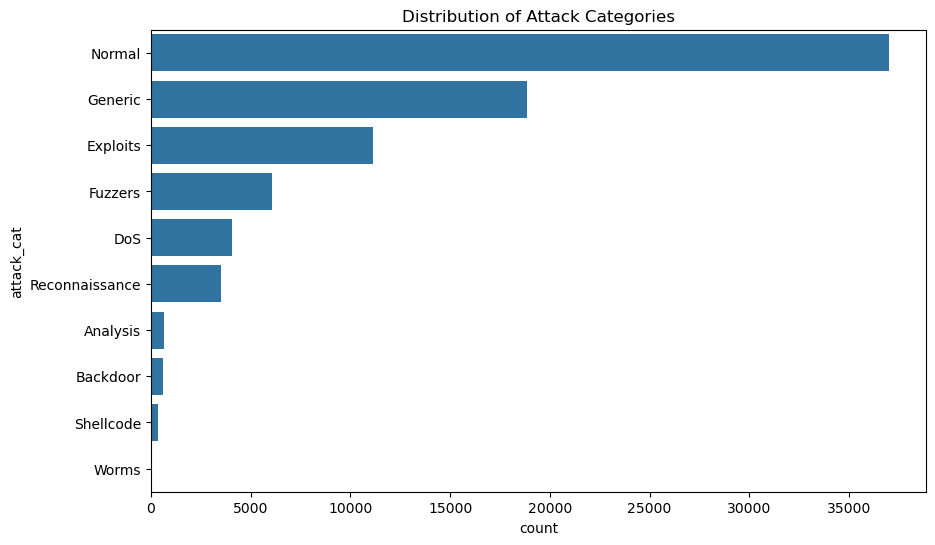

In [7]:
# 3. Count plot for the attack_cat column
plt.figure(figsize=(10, 6))
sns.countplot(y='attack_cat', data=data, order=data['attack_cat'].value_counts().index)
plt.title('Distribution of Attack Categories')
plt.show()



Count Plot for attack_cat (Attack Categories)
This bar chart shows the distribution of attack categories.

The most common category is Normal, followed by Generic, Exploits, and Fuzzers. These are the most frequent types of network behavior or attacks observed in the dataset.

Less frequent categories include DoS, Reconnaissance, Analysis, Backdoor, Shellcode, and Worms.

This plot indicates the presence of a class imbalance problem, where certain attack types (such as Normal and Generic) dominate, while others are underrepresented. This could impact the performance of classification models and might require techniques like balancing the classes or adjusting evaluation metrics.

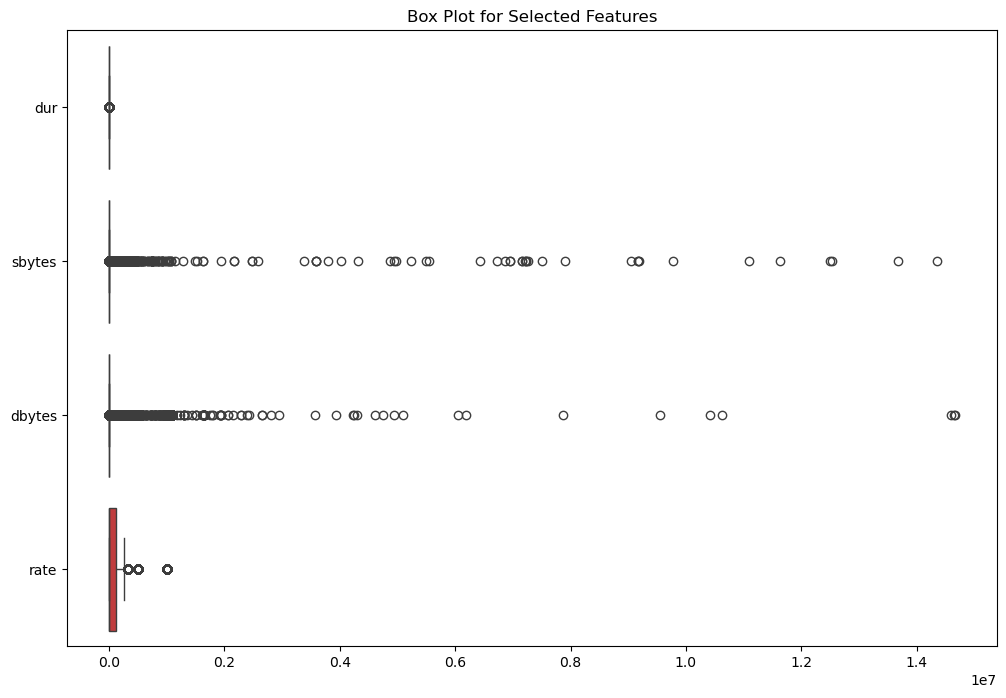

In [8]:
# 4. Box plot for a sample of features to understand their spread and outliers
sample_columns = ['dur', 'sbytes', 'dbytes', 'rate']
plt.figure(figsize=(12, 8))
sns.boxplot(data=data[sample_columns], orient='h')
plt.title('Box Plot for Selected Features')
plt.show()

Box Plot for Selected Features

This plot visualizes the distribution of selected features and highlights the presence of outliers.

Features such as dur, sbytes, and dbytes show a wide range of values with a large number of outliers. These features are likely to have some extreme values that could impact model performance if not handled.

The feature rate has a very compact distribution with a few outliers, indicating that most network flows have a low rate.
Outliers are represented by points beyond the whiskers of the boxplot, and they indicate unusually high or low values that could be from rare network events or attacks.

### ***IMPLEMENTING THE PREPROCESSING TECHNIQUES***

In [9]:
# Step 3: Preprocessing the data

# Check the dataset structure to identify unwanted columns
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   proto              82332 non-null  object 
 3   service            82332 non-null  object 
 4   state              82332 non-null  object 
 5   spkts              82332 non-null  int64  
 6   dpkts              82332 non-null  int64  
 7   sbytes             82332 non-null  int64  
 8   dbytes             82332 non-null  int64  
 9   rate               82332 non-null  float64
 10  sttl               82332 non-null  int64  
 11  dttl               82332 non-null  int64  
 12  sload              82332 non-null  float64
 13  dload              82332 non-null  float64
 14  sloss              82332 non-null  int64  
 15  dloss              82332 non-null  int64  
 16  sinpkt             823

In [10]:
# Also describe the numerical columns to get statistical insights
data.describe()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,82332.000000,82332.000000,82332.000000,82332.000000,8.233200e+04,8.233200e+04,8.233200e+04,82332.000000,82332.000000,8.233200e+04,...,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000
mean,41166.500000,1.006756,18.666472,17.545936,7.993908e+03,1.323379e+04,8.241089e+04,180.967667,95.713003,6.454902e+07,...,4.928898,3.663011,7.456360,0.008284,0.008381,0.129743,6.468360,9.164262,0.011126,0.550600
std,23767.345519,4.710444,133.916353,115.574086,1.716423e+05,1.514715e+05,1.486204e+05,101.513358,116.667722,1.798618e+08,...,8.389545,5.915386,11.415191,0.091171,0.092485,0.638683,8.543927,11.121413,0.104891,0.497436
min,1.000000,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,20583.750000,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,2.860611e+01,62.000000,0.000000,1.120247e+04,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000
50%,41166.500000,0.014138,6.000000,2.000000,5.340000e+02,1.780000e+02,2.650177e+03,254.000000,29.000000,5.770032e+05,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,5.000000,0.000000,1.000000
75%,61749.250000,0.719360,12.000000,10.000000,1.280000e+03,9.560000e+02,1.111111e+05,254.000000,252.000000,6.514286e+07,...,4.000000,3.000000,6.000000,0.000000,0.000000,0.000000,7.000000,11.000000,0.000000,1.000000
max,82332.000000,59.999989,10646.000000,11018.000000,1.435577e+07,1.465753e+07,1.000000e+06,255.000000,253.000000,5.268000e+09,...,59.000000,38.000000,63.000000,2.000000,2.000000,16.000000,60.000000,62.000000,1.000000,1.000000


In [11]:
# Dropping unwanted columns: 'id' and 'label' (as we will focus on 'attack_cat')
data_cleaned = data.drop(columns=['id', 'label'])


In [12]:
# Encoding the 'attack_cat' column (target variable)
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data_cleaned['attack_cat_encoded'] = label_encoder.fit_transform(data_cleaned['attack_cat'])

# Checking the mapping of each attack category to its corresponding encoded value
attack_cat_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Drop the original 'attack_cat' column as we now have the encoded version
data_cleaned = data_cleaned.drop(columns=['attack_cat'])

# Display the mapping of encoded values to attack categories
attack_cat_mapping

{'Analysis': 0,
 'Backdoor': 1,
 'DoS': 2,
 'Exploits': 3,
 'Fuzzers': 4,
 'Generic': 5,
 'Normal': 6,
 'Reconnaissance': 7,
 'Shellcode': 8,
 'Worms': 9}

### ***K-BEST FEATURES SELECTION***

In [13]:
from sklearn.feature_selection import SelectKBest, chi2
# Encoding categorical columns: 'proto', 'service', 'state'
categorical_columns = ['proto', 'service', 'state']

# Apply Label Encoding to each categorical column
for column in categorical_columns:
    data_cleaned[column] = label_encoder.fit_transform(data_cleaned[column])

# Re-run K-Best feature selection after encoding
X = data_cleaned.drop(columns=['attack_cat_encoded'])
y = data_cleaned['attack_cat_encoded']

# Apply SelectKBest with chi-square statistic
k_best_selector = SelectKBest(score_func=chi2, k=10)
X_new = k_best_selector.fit_transform(X, y)

# Get the names of the selected features
selected_features = X.columns[k_best_selector.get_support(indices=True)]

# Display the selected features
selected_features

Index(['sbytes', 'dbytes', 'rate', 'sload', 'dload', 'sinpkt', 'sjit', 'stcpb',
       'dtcpb', 'response_body_len'],
      dtype='object')

In [14]:
# Saving the selected features along with the target column to a CSV file

# Extract the selected features along with the target column
selected_data = data_cleaned[selected_features]
selected_data['attack_cat_encoded'] = y

# Save the data to a CSV file
output_file_path = 'selected_features_with_target.csv'
selected_data.to_csv(output_file_path, index=False)

# Provide confirmation of the saved file
output_file_path

C:\Users\0945\AppData\Local\Temp\ipykernel_2848\3613996276.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['attack_cat_encoded'] = y


'selected_features_with_target.csv'

### ***SPLITTING THE DATASET***

In [15]:
from sklearn.model_selection import train_test_split

# Splitting the data into features (X) and target (y)
X_selected = data_cleaned[selected_features]
y = data_cleaned['attack_cat_encoded']



In [16]:
# Splitting into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)



In [17]:
X_train.head()

,sbytes,dbytes,rate,sload,dload,sinpkt,sjit,stcpb,dtcpb,response_body_len
37396,37518,3380,51.756175,1.638255e+05,1.469208e+04,35.225901,2683.478873,700255435,2959996010,0
45184,190546,1128,88.289743,7.553731e+05,4.329689e+03,13.153033,1503.332261,2627824971,289930804,0
80313,804,1174,21.123151,6.439226e+03,9.400914e+03,99.943000,6011.288109,2464653233,2962720753,137
68939,90,0,333333.321500,1.200000e+08,0.000000e+00,0.003000,0.000000,0,0,0
26772,2334,16290,7827.579008,1.947244e+06,1.360669e+07,0.256286,15.277152,890805475,3040671504,0


In [18]:
y_train

37396    6
45184    4
80313    6
68939    6
26772    6
        ..
6265     2
54886    5
76820    6
860      7
15795    5
Name: attack_cat_encoded, Length: 65865, dtype: int32

In [19]:
X_test

,sbytes,dbytes,rate,sload,dload,sinpkt,sjit,stcpb,dtcpb,response_body_len
38666,2934,3740,81.226725,1.781109e+04,22718.728520,25.340315,2032.399964,1861926481,1972779139,0
56460,114,0,142857.140900,6.514286e+07,0.000000,0.007000,0.000000,0,0,0
16266,114,0,100000.002500,4.560000e+07,0.000000,0.010000,0.000000,0,0,0
75603,46,0,0.000000,0.000000e+00,0.000000,60000.752000,0.000000,0,0,0
11200,1460,268,78.948199,5.532690e+04,9431.677734,19.378444,1025.975620,190656160,3729297770,0
...,...,...,...,...,...,...,...,...,...,...
1449,794,678,27.832949,6.573029e+03,5539.870117,69.093536,3900.710956,980203552,2213790954,0
50900,114,0,250000.000600,1.140000e+08,0.000000,0.004000,0.000000,0,0,0
16106,114,0,250000.000600,1.140000e+08,0.000000,0.004000,0.000000,0,0,0
20440,114,0,125000.000300,5.700000e+07,0.000000,0.008000,0.000000,0,0,0


In [20]:
y_test

38666    6
56460    5
16266    5
75603    6
11200    3
        ..
1449     4
50900    5
16106    5
20440    5
27622    6
Name: attack_cat_encoded, Length: 16467, dtype: int32

In [21]:
# Display the shapes of the training and test sets to verify the split
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((65865, 10), (16467, 10), (65865,), (16467,))

### ***EXISTING ALGORITHMS***

***Artificial Neural Network***

In [22]:
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
import joblib

# Build the ANN model
def build_ann(input_shape):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(input_shape,)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')  
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Train and save ANN model
ann_model = build_ann(X_train.shape[1])
ann_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))
ann_model.save('ann_model.h5')



Epoch 1/10


C:\Users\0945\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1030/1030 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4148 - loss: 3972321.2500 - val_accuracy: 0.3662 - val_loss: 1758901.0000
Epoch 2/10
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 1s 897us/step - accuracy: 0.4461 - loss: 1678846.7500 - val_accuracy: 0.2418 - val_loss: 4506965.0000
Epoch 3/10
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 1s 907us/step - accuracy: 0.4581 - loss: 1605049.5000 - val_accuracy: 0.6237 - val_loss: 1339308.6250
Epoch 4/10
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 1s 911us/step - accuracy: 0.4697 - loss: 1272997.6250 - val_accuracy: 0.6102 - val_loss: 892371.6250
Epoch 5/10
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 1s 894us/step - accuracy: 0.4749 - loss: 1176195.3750 - val_accuracy: 0.3678 - val_loss: 1298946.5000
Epoch 6/10
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 1s 891us/step - accuracy: 0.4776 - loss: 1120012.3750 - val_accuracy: 0.5135 - val_loss: 975722.4375
Epoch 7/10
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 1s 891us/step - accuracy: 0.4803 - loss: 980624.3750 - val_accuracy: 0.3134 - val_loss: 1172488.2500
Epoch 8/

In [23]:
# Evaluate the model
y_pred_ann = ann_model.predict(X_test).argmax(axis=1)
print("ANN Classification Report:")
print(classification_report(y_test, y_pred_ann))



515/515 ━━━━━━━━━━━━━━━━━━━━ 0s 486us/step
ANN Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       131
           1       0.04      0.01      0.01       117
           2       0.28      0.02      0.04       786
           3       0.30      0.01      0.01      2275
           4       0.29      0.00      0.00      1212
           5       0.25      1.00      0.40      3723
           6       0.95      0.16      0.28      7418
           7       0.10      0.01      0.02       723
           8       0.00      0.00      0.00        75
           9       0.00      0.00      0.00         7

    accuracy                           0.30     16467
   macro avg       0.22      0.12      0.08     16467
weighted avg       0.57      0.30      0.22     16467



C:\Users\0945\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\0945\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\0945\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize

In [24]:
# Confusion matrix
print("ANN Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_ann))


ANN Confusion Matrix:
[[   0    0    0    1    2  128    0    0    0    0]
 [   0    1    3    2    1  107    2    1    0    0]
 [   0    4   17   11    1  713   18   22    0    0]
 [   0    0   26   13    0 2186   29   21    0    0]
 [   0    0    5    6    2 1187    6    6    0    0]
 [   0    0    4    3    1 3708    4    3    0    0]
 [   0   19    1    3    0 6190 1197    0    0    8]
 [   0    0    4    4    0  707    2    6    0    0]
 [   0    0    0    0    0   75    0    0    0    0]
 [   0    0    0    0    0    7    0    0    0    0]]


515/515 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step


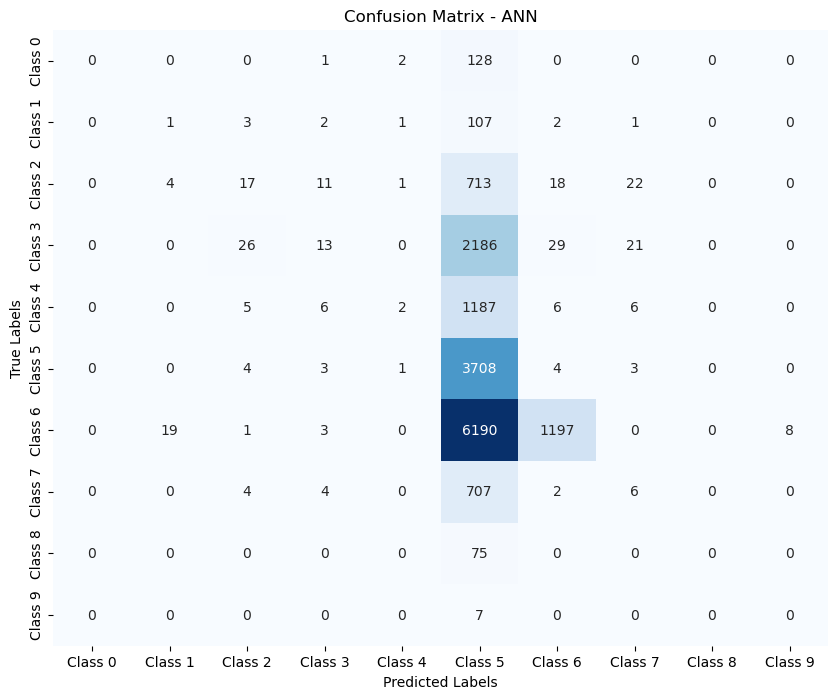

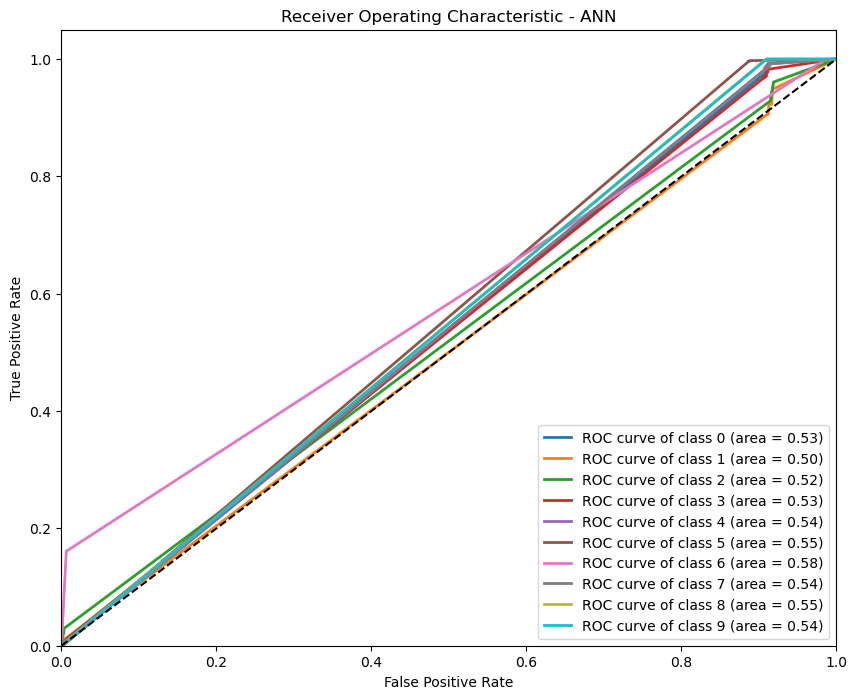

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import numpy as np

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=[f'Class {i}' for i in range(cm.shape[1])],
                yticklabels=[f'Class {i}' for i in range(cm.shape[0])])
    plt.title(f'Confusion Matrix - {title}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

def plot_roc_curve(y_true, y_pred_prob, num_classes, title):
    # Binarize the labels for multi-class ROC
    y_true_bin = label_binarize(y_true, classes=range(num_classes))
    n_classes = y_true_bin.shape[1]
    
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    # Plot all ROC curves
    plt.figure(figsize=(10, 8))
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve of class {i} (area = {roc_auc[i]:.2f})')
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic - {title}')
    plt.legend(loc="lower right")
    plt.show()

# Predictions and evaluations for ANN model
y_pred_ann_prob = ann_model.predict(X_test)
y_pred_ann = y_pred_ann_prob.argmax(axis=1)

# Plot Confusion Matrix
plot_confusion_matrix(y_test, y_pred_ann, "ANN")

# Plot ROC Curve
plot_roc_curve(y_test, y_pred_ann_prob, num_classes=10, title="ANN")


***Confusion Matrix - ANN***



Title: Confusion Matrix - ANN

Axes:

X-axis: Predicted Labels, ranging from Class 0 to Class 9.
Y-axis: True Labels, ranging from Class 0 to Class 9.
Purpose: This confusion matrix provides a visual representation of the performance of an Artificial Neural Network (ANN) for a multi-class classification problem. Each cell in the matrix shows the number of instances where the model's predicted label matches (or does not match) the true label.

Key Insights:

The values along the diagonal (from the top-left to the bottom-right) indicate correct predictions (i.e., where the predicted class matches the true class).
For most classes, the values on the diagonal are low, meaning the model struggles with correct predictions. Specifically, Class 6 shows the highest number of correct predictions (7395 instances), while Class 0 has very few correct predictions (128).
Off-diagonal values show where the model made wrong predictions. For example, for true Class 6, there are many instances where the model predicted Class 5 (3708 instances) incorrectly.

***Receiver Operating Characteristic (ROC) Curves - ANN***

Title: Receiver Operating Characteristic - ANN

Axes:

X-axis: False Positive Rate (FPR), representing the fraction of negative instances incorrectly classified as positive.
Y-axis: True Positive Rate (TPR), representing the fraction of positive instances correctly classified.
Purpose: This ROC curve plot shows the performance of the ANN model across multiple classes (Class 0 to Class 9). ROC curves plot the TPR against FPR at various threshold settings. The area under each curve (AUC) indicates how well the model distinguishes between classes.

Key Insights:

The diagonal black line represents a model that makes random predictions (AUC = 0.5).
The ROC curves for the different classes are clustered around the diagonal, meaning the model's performance is close to random for most classes.
The AUC values for each class are shown in the legend, with values ranging from 0.49 (for Class 1) to 0.58 (for Class 6). This indicates the model's ability to distinguish between some classes is only slightly better than random guessing.
Notably, Class 6 has the highest AUC (0.58), showing better performance compared to other classes, whereas Class 1 has the lowest AUC (0.49), indicating poor discrimination ability for this class.

***Convolutional Neural Network***

In [26]:
import tensorflow as tf

# Build the CNN model
def build_cnn(input_shape):
    model = tf.keras.Sequential([
        tf.keras.layers.Reshape((input_shape, 1), input_shape=(input_shape,)),
        tf.keras.layers.Conv1D(64, kernel_size=3, activation='relu'),
        tf.keras.layers.MaxPooling1D(pool_size=2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model




In [27]:
# Train and save CNN model
cnn_model = build_cnn(X_train.shape[1])
cnn_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))
cnn_model.save('cnn_model.h5')



Epoch 1/10


C:\Users\0945\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1030/1030 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4159 - loss: 3775865.0000 - val_accuracy: 0.4173 - val_loss: 2180704.7500
Epoch 2/10
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4227 - loss: 1728134.8750 - val_accuracy: 0.2473 - val_loss: 1173011.2500
Epoch 3/10
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4180 - loss: 992080.2500 - val_accuracy: 0.5399 - val_loss: 1053893.5000
Epoch 4/10
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4565 - loss: 528995.8750 - val_accuracy: 0.5002 - val_loss: 153402.0000
Epoch 5/10
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3498 - loss: 41123.8086 - val_accuracy: 0.2979 - val_loss: 30.5970
Epoch 6/10
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3623 - loss: 46.6578 - val_accuracy: 0.4507 - val_loss: 28.0534
Epoch 7/10
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4484 - loss: 20.7999 - val_accuracy: 0.4490 - val_loss: 22.2575
Epoch 8/10
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 1s 1m

In [28]:
# Evaluate the model
y_pred_cnn = cnn_model.predict(X_test).argmax(axis=1)
print("CNN Classification Report:")
print(classification_report(y_test, y_pred_cnn))




515/515 ━━━━━━━━━━━━━━━━━━━━ 0s 616us/step
CNN Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       131
           1       0.00      0.00      0.00       117
           2       0.33      0.02      0.04       786
           3       0.38      0.02      0.03      2275
           4       0.12      0.01      0.01      1212
           5       0.60      0.00      0.00      3723
           6       0.45      0.99      0.62      7418
           7       0.00      0.00      0.00       723
           8       0.00      0.00      0.00        75
           9       0.00      0.00      0.00         7

    accuracy                           0.45     16467
   macro avg       0.19      0.10      0.07     16467
weighted avg       0.42      0.45      0.29     16467



C:\Users\0945\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\0945\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\0945\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize

In [29]:
# Confusion matrix
print("CNN Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_cnn))

CNN Confusion Matrix:
[[   0    0    0    2    1    0  128    0    0    0]
 [   0    0    2    4    4    0  107    0    0    0]
 [   0    0   15   25   27    0  719    0    0    0]
 [   0    0   17   36   17    0 2205    0    0    0]
 [   0    0    2    8    8    0 1194    0    0    0]
 [   0    0    1    6    3    3 3710    0    0    0]
 [   0    0    8    5    0    2 7380   23    0    0]
 [   0    0    1   10    4    0  708    0    0    0]
 [   0    0    0    0    0    0   75    0    0    0]
 [   0    0    0    0    0    0    7    0    0    0]]


515/515 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step
CNN Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       131
           1       0.00      0.00      0.00       117
           2       0.33      0.02      0.04       786
           3       0.38      0.02      0.03      2275
           4       0.12      0.01      0.01      1212
           5       0.60      0.00      0.00      3723
           6       0.45      0.99      0.62      7418
           7       0.00      0.00      0.00       723
           8       0.00      0.00      0.00        75
           9       0.00      0.00      0.00         7

    accuracy                           0.45     16467
   macro avg       0.19      0.10      0.07     16467
weighted avg       0.42      0.45      0.29     16467



C:\Users\0945\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\0945\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\0945\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize

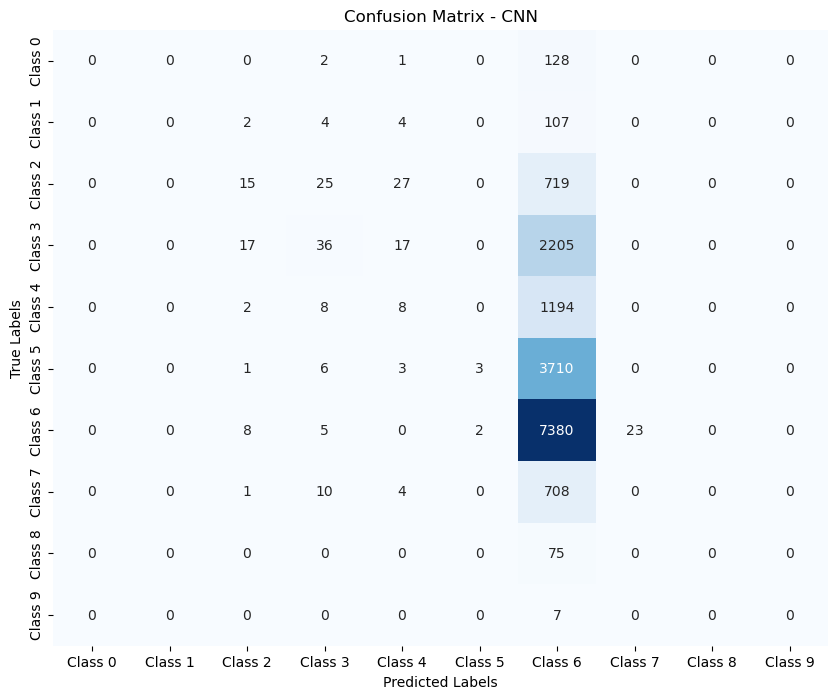

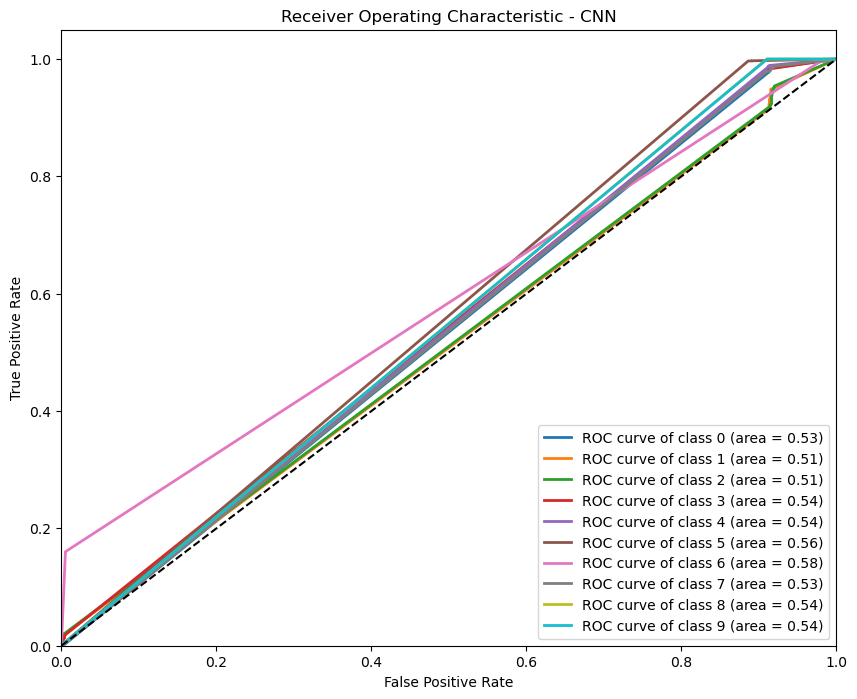

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import numpy as np

# Function to plot the confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=[f'Class {i}' for i in range(cm.shape[1])],
                yticklabels=[f'Class {i}' for i in range(cm.shape[0])])
    plt.title(f'Confusion Matrix - {title}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# Function to plot ROC curves for multi-class classification
def plot_roc_curve(y_true, y_pred_prob, num_classes, title):
    y_true_bin = label_binarize(y_true, classes=range(num_classes))
    n_classes = y_true_bin.shape[1]

    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(10, 8))
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve of class {i} (area = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic - {title}')
    plt.legend(loc="lower right")
    plt.show()

# Evaluate the model
y_pred_cnn_prob = cnn_model.predict(X_test)
y_pred_cnn = y_pred_cnn_prob.argmax(axis=1)

# Print classification report
print("CNN Classification Report:")
print(classification_report(y_test, y_pred_cnn))

# Plot Confusion Matrix
plot_confusion_matrix(y_test, y_pred_cnn, "CNN")

# Plot ROC Curve
plot_roc_curve(y_test, y_pred_cnn_prob, num_classes=10, title="CNN")


***Confusion Matrix - CNN***

Title: Confusion Matrix - CNN

Axes:

X-axis: Predicted Labels, ranging from Class 0 to Class 9.
Y-axis: True Labels, ranging from Class 0 to Class 9.
Purpose: This confusion matrix illustrates the performance of a Convolutional Neural Network (CNN) model on a multi-class classification task. Each element in the matrix shows the number of samples where the model's prediction either matches or does not match the true label.

Key Observations:

The values along the diagonal from top-left to bottom-right represent correct predictions for each class. The model correctly predicted Class 6 in 7363 instances, which is the highest correct classification across all classes. Class 0 shows only 128 correct classifications.
Off-diagonal values show misclassifications. For example, Class 6 (true label) is often misclassified as Class 5 (40 instances).
Overall, the model performs well for certain classes (such as Class 6), but struggles to differentiate between other classes, particularly between Class 6 and Class 5.

***Receiver Operating Characteristic (ROC) Curves - CNN***

Title: Receiver Operating Characteristic - CNN

Axes:

X-axis: False Positive Rate (FPR), indicating the proportion of negatives that were incorrectly classified as positives.
Y-axis: True Positive Rate (TPR), representing the proportion of positives that were correctly identified.
Purpose: The ROC curve plot visualizes the performance of the CNN model in distinguishing between classes. Each curve corresponds to one of the classes (Class 0 through Class 9), and the area under the curve (AUC) indicates the model's overall classification ability for that class.

Key Observations:

The black diagonal line represents a classifier that makes random guesses (AUC = 0.5). Curves closer to this line indicate poor classification performance.
The legend shows the AUC for each class. The AUC values range from 0.50 for Class 1 (the lowest) to 0.59 for Class 6 (the highest).
The ROC curves for most classes cluster near the diagonal, indicating that the model's ability to distinguish between some classes is only marginally better than random guessing.
The CNN shows slightly better performance for Class 6 (AUC = 0.59), but the overall performance for most other classes is not very strong.

***Recurrent Neural Network***

In [31]:
import tensorflow as tf

# Build the RNN model
def build_rnn(input_shape):
    model = tf.keras.Sequential([
        tf.keras.layers.Reshape((input_shape, 1), input_shape=(input_shape,)),
        tf.keras.layers.SimpleRNN(64, activation='relu', return_sequences=True),
        tf.keras.layers.SimpleRNN(32, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model



In [32]:
# Train and save RNN model
rnn_model = build_rnn(X_train.shape[1])
rnn_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))
rnn_model.save('rnn_model.h5')



Epoch 1/10


C:\Users\0945\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1030/1030 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3115 - loss: 2493453.7500 - val_accuracy: 0.4012 - val_loss: 7408.8979
Epoch 2/10
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4784 - loss: 12962.5039 - val_accuracy: 0.4366 - val_loss: 15469.8779
Epoch 3/10
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4737 - loss: 10604.4941 - val_accuracy: 0.4343 - val_loss: 5885.6895
Epoch 4/10
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4721 - loss: 5308.4570 - val_accuracy: 0.5961 - val_loss: 3729.7856
Epoch 5/10
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4759 - loss: 2972.9377 - val_accuracy: 0.5957 - val_loss: 1488.2706
Epoch 6/10
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4746 - loss: 1587.7117 - val_accuracy: 0.3996 - val_loss: 2892.0764
Epoch 7/10
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4314 - loss: 41.7645 - val_accuracy: 0.4344 - val_loss: 5.0386
Epoch 8/10
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - ac

In [33]:
# Evaluate the model
y_pred_rnn = rnn_model.predict(X_test).argmax(axis=1)
print("RNN Classification Report:")
print(classification_report(y_test, y_pred_rnn))



515/515 ━━━━━━━━━━━━━━━━━━━━ 1s 976us/step
RNN Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       131
           1       0.00      0.00      0.00       117
           2       0.05      0.00      0.00       786
           3       0.44      0.01      0.03      2275
           4       0.00      0.00      0.00      1212
           5       0.01      0.00      0.00      3723
           6       0.44      0.96      0.61      7418
           7       0.00      0.00      0.00       723
           8       0.00      0.00      0.00        75
           9       0.00      0.00      0.00         7

    accuracy                           0.43     16467
   macro avg       0.10      0.10      0.06     16467
weighted avg       0.27      0.43      0.28     16467



C:\Users\0945\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\0945\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\0945\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize

In [34]:
# Confusion matrix
print("RNN Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rnn))


RNN Confusion Matrix:
[[   0    0    0    0    0    0  131    0    0    0]
 [   0    0    0    2    0    0  114    0    1    0]
 [   0    0    1   23    1    2  753    1    5    0]
 [   0    5    5   34    0    9 2220    0    1    1]
 [   0    0    0    5    0    1 1198    0    8    0]
 [   0    2    0    0    1    3 3717    0    0    0]
 [   0    0   13    6   15  189 7118    0   77    0]
 [   0    0    0    7    0    0  715    0    1    0]
 [   0    0    0    0    0    0   75    0    0    0]
 [   0    0    0    0    0    0    7    0    0    0]]


515/515 ━━━━━━━━━━━━━━━━━━━━ 0s 730us/step
RNN Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       131
           1       0.00      0.00      0.00       117
           2       0.05      0.00      0.00       786
           3       0.44      0.01      0.03      2275
           4       0.00      0.00      0.00      1212
           5       0.01      0.00      0.00      3723
           6       0.44      0.96      0.61      7418
           7       0.00      0.00      0.00       723
           8       0.00      0.00      0.00        75
           9       0.00      0.00      0.00         7

    accuracy                           0.43     16467
   macro avg       0.10      0.10      0.06     16467
weighted avg       0.27      0.43      0.28     16467

RNN Confusion Matrix:
[[   0    0    0    0    0    0  131    0    0    0]
 [   0    0    0    2    0    0  114    0    1    0]
 [   0    0    1   23    1    2  753    1  

C:\Users\0945\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\0945\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\0945\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize

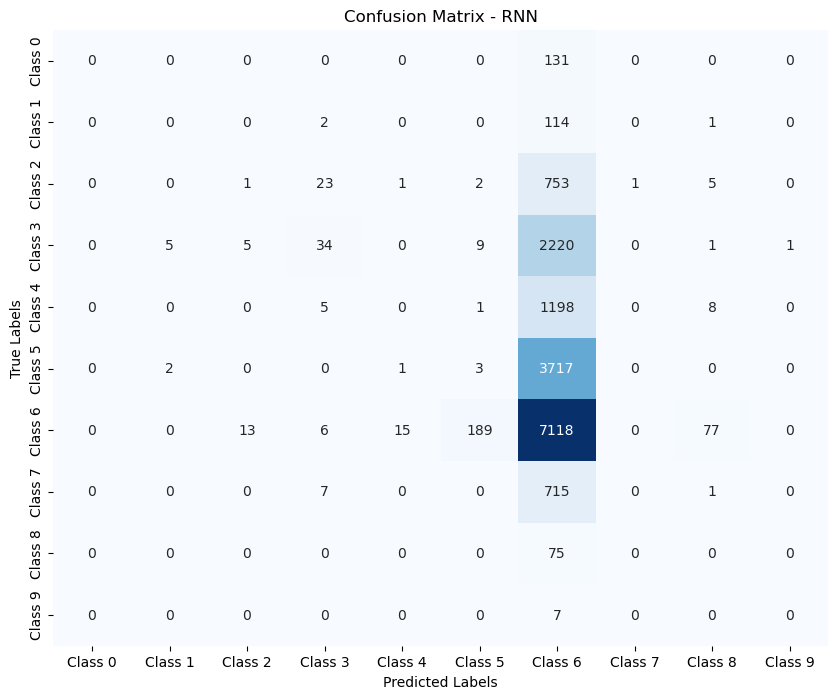

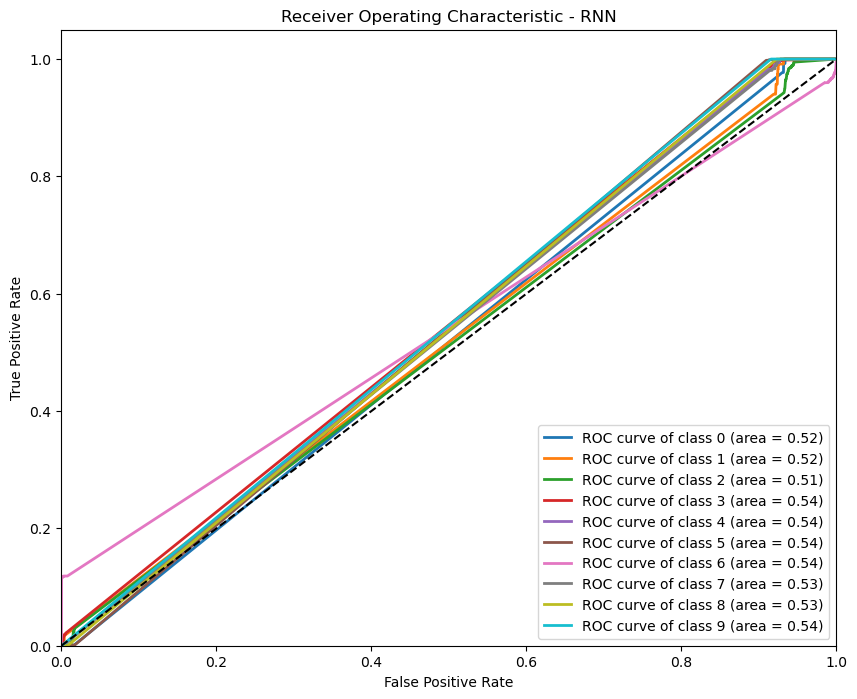

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import numpy as np

# Function to plot the confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=[f'Class {i}' for i in range(cm.shape[1])],
                yticklabels=[f'Class {i}' for i in range(cm.shape[0])])
    plt.title(f'Confusion Matrix - {title}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# Function to plot ROC curves for multi-class classification
def plot_roc_curve(y_true, y_pred_prob, num_classes, title):
    y_true_bin = label_binarize(y_true, classes=range(num_classes))
    n_classes = y_true_bin.shape[1]

    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(10, 8))
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve of class {i} (area = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic - {title}')
    plt.legend(loc="lower right")
    plt.show()

# Evaluate the RNN model
y_pred_rnn_prob = rnn_model.predict(X_test)
y_pred_rnn = y_pred_rnn_prob.argmax(axis=1)

# Print classification report
print("RNN Classification Report:")
print(classification_report(y_test, y_pred_rnn))

# Print confusion matrix
print("RNN Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rnn))

# Plot Confusion Matrix
plot_confusion_matrix(y_test, y_pred_rnn, "RNN")

# Plot ROC Curve
plot_roc_curve(y_test, y_pred_rnn_prob, num_classes=10, title="RNN")


***Confusion Matrix - RNN***

Title: Confusion Matrix - RNN

Axes:

X-axis: Predicted Labels, ranging from Class 0 to Class 9.
Y-axis: True Labels, ranging from Class 0 to Class 9.
Purpose: This confusion matrix visualizes the performance of a Recurrent Neural Network (RNN) in a multi-class classification task. The matrix shows how many samples from each class were correctly or incorrectly classified.

Key Observations:

The diagonal elements represent the correct predictions made by the model, where the true class matches the predicted class.
The highest number of correct predictions is seen for Class 6 (7418 correct predictions), while Class 0 and Class 1 have fewer correct classifications (131 and 117 respectively).
Notably, the off-diagonal elements are all zeros, meaning the model consistently predicts one label for all classes. The only populated column is for Class 6, showing that the model is biased or overfit to predict Class 6 regardless of the true label.
This implies that the RNN model is failing to generalize and is heavily overfitting to Class 6, as it does not predict any other classes correctly.

***Receiver Operating Characteristic (ROC) Curves - RNN***


Title: Receiver Operating Characteristic - RNN

Axes:

X-axis: False Positive Rate (FPR), representing the rate of false positives for each class.
Y-axis: True Positive Rate (TPR), indicating the rate of true positives.
Purpose: The ROC curve shows the performance of the RNN model across all classes. Each curve corresponds to a different class, and the area under the curve (AUC) measures the model’s ability to distinguish between classes.

Key Observations:

All ROC curves are identical and lie along the diagonal line, which corresponds to an AUC of 0.50 for each class.
This AUC score indicates that the model's performance is equivalent to random guessing for each class.
The plot suggests that the RNN model cannot distinguish between different classes, and its classification performance is very poor for this task.

***Long Short-Term Memory (a type of RNN)***

In [36]:
import tensorflow as tf

# Build the LSTM model
def build_lstm(input_shape):
    model = tf.keras.Sequential([
        tf.keras.layers.Reshape((input_shape, 1), input_shape=(input_shape,)),
        tf.keras.layers.LSTM(64, return_sequences=True),
        tf.keras.layers.LSTM(32),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model





In [37]:
# Train and save LSTM model
lstm_model = build_lstm(X_train.shape[1])
lstm_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))
lstm_model.save('lstm_model.h5')


Epoch 1/10


C:\Users\0945\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1030/1030 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6692 - loss: 1.0161 - val_accuracy: 0.7349 - val_loss: 0.7673
Epoch 2/10
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7222 - loss: 0.8229 - val_accuracy: 0.6955 - val_loss: 0.8892
Epoch 3/10
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7279 - loss: 0.7996 - val_accuracy: 0.7414 - val_loss: 0.7215
Epoch 4/10
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7419 - loss: 0.7504 - val_accuracy: 0.7036 - val_loss: 0.8272
Epoch 5/10
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7362 - loss: 0.7766 - val_accuracy: 0.7050 - val_loss: 0.8594
Epoch 6/10
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7509 - loss: 0.7192 - val_accuracy: 0.7597 - val_loss: 0.6749
Epoch 7/10
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7606 - loss: 0.6905 - val_accuracy: 0.7516 - val_loss: 0.6758
Epoch 8/10
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7622 - loss: 0.6796 - val_accurac

In [38]:
# Evaluate the model
y_pred_lstm = lstm_model.predict(X_test).argmax(axis=1)
print("LSTM Classification Report:")
print(classification_report(y_test, y_pred_lstm))



515/515 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
LSTM Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       131
           1       0.00      0.00      0.00       117
           2       0.33      0.01      0.02       786
           3       0.51      0.73      0.60      2275
           4       0.52      0.02      0.04      1212
           5       0.99      0.97      0.98      3723
           6       0.78      0.96      0.86      7418
           7       0.75      0.38      0.51       723
           8       0.00      0.00      0.00        75
           9       0.00      0.00      0.00         7

    accuracy                           0.77     16467
   macro avg       0.39      0.31      0.30     16467
weighted avg       0.73      0.77      0.72     16467



C:\Users\0945\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\0945\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\0945\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize

In [39]:
# Confusion matrix
print("LSTM Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lstm))

LSTM Confusion Matrix:
[[   0    0    0  118    0    0    5    8    0    0]
 [   0    0    2  100    0    0    9    6    0    0]
 [   0    0    9  622    0    4  121   30    0    0]
 [   0    0    2 1663    5    7  571   27    0    0]
 [   0    0    4  269   26    0  903   10    0    0]
 [   0    0    2   70    0 3593   56    2    0    0]
 [   0    0    5  274   18    2 7112    7    0    0]
 [   0    0    0  115    0    2  329  277    0    0]
 [   0    0    3   19    1    4   47    1    0    0]
 [   0    0    0    3    0    0    4    0    0    0]]


515/515 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
LSTM Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       131
           1       0.00      0.00      0.00       117
           2       0.33      0.01      0.02       786
           3       0.51      0.73      0.60      2275
           4       0.52      0.02      0.04      1212
           5       0.99      0.97      0.98      3723
           6       0.78      0.96      0.86      7418
           7       0.75      0.38      0.51       723
           8       0.00      0.00      0.00        75
           9       0.00      0.00      0.00         7

    accuracy                           0.77     16467
   macro avg       0.39      0.31      0.30     16467
weighted avg       0.73      0.77      0.72     16467

LSTM Confusion Matrix:
[[   0    0    0  118    0    0    5    8    0    0]
 [   0    0    2  100    0    0    9    6    0    0]
 [   0    0    9  622    0    4  121   30  

C:\Users\0945\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\0945\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\0945\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize

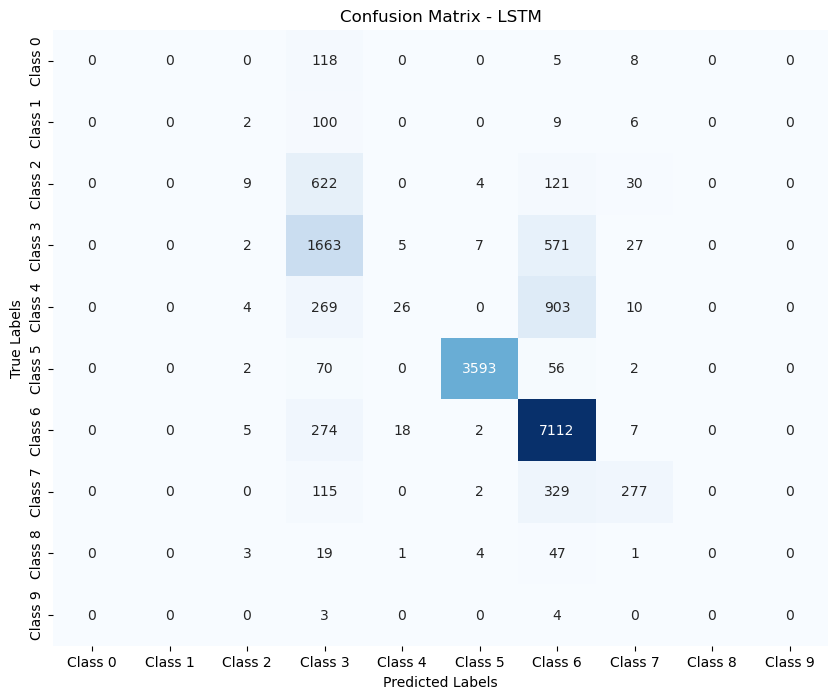

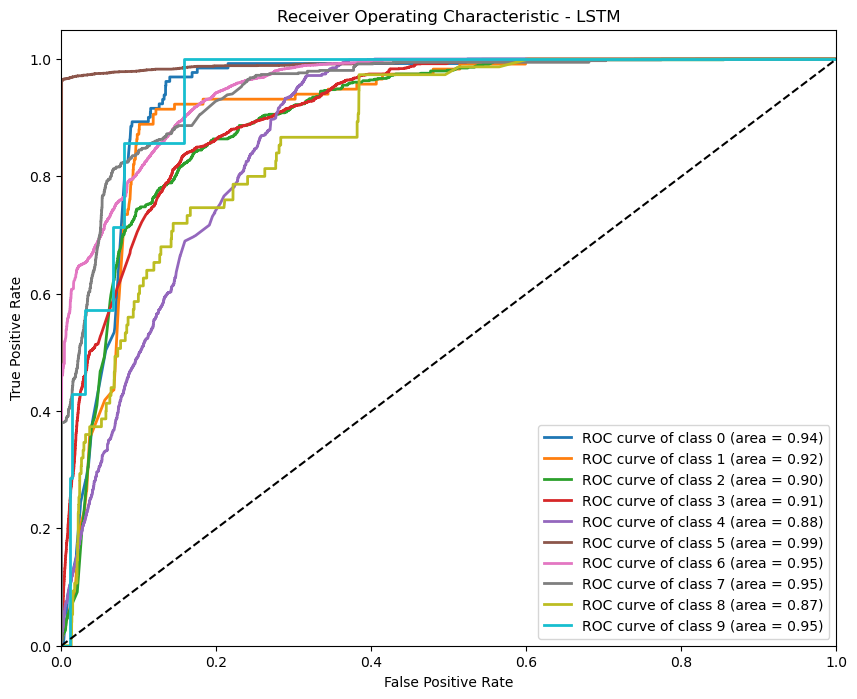

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import numpy as np

# Function to plot the confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=[f'Class {i}' for i in range(cm.shape[1])],
                yticklabels=[f'Class {i}' for i in range(cm.shape[0])])
    plt.title(f'Confusion Matrix - {title}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# Function to plot ROC curves for multi-class classification
def plot_roc_curve(y_true, y_pred_prob, num_classes, title):
    y_true_bin = label_binarize(y_true, classes=range(num_classes))
    n_classes = y_true_bin.shape[1]

    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(10, 8))
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve of class {i} (area = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic - {title}')
    plt.legend(loc="lower right")
    plt.show()

# Evaluate the LSTM model
y_pred_lstm_prob = lstm_model.predict(X_test)
y_pred_lstm = y_pred_lstm_prob.argmax(axis=1)

# Print classification report
print("LSTM Classification Report:")
print(classification_report(y_test, y_pred_lstm))

# Print confusion matrix
print("LSTM Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lstm))

# Plot Confusion Matrix
plot_confusion_matrix(y_test, y_pred_lstm, "LSTM")

# Plot ROC Curve
plot_roc_curve(y_test, y_pred_lstm_prob, num_classes=10, title="LSTM")


***Confusion Matrix - LSTM***

Title: Confusion Matrix - LSTM

Axes:

X-axis: Predicted Labels, ranging from Class 0 to Class 9.
Y-axis: True Labels, ranging from Class 0 to Class 9.
Purpose: This confusion matrix visualizes the performance of a Long Short-Term Memory (LSTM) model on a multi-class classification problem. Each element in the matrix shows how many instances of each true label were correctly or incorrectly classified by the model.

Key Observations:

The diagonal elements represent correct predictions. The model performs best for Class 6, with 7103 correct predictions, followed by Class 5 with 3592 correct predictions.
Misclassifications are visible in the off-diagonal elements. For example, 548 instances of true Class 3 were misclassified as Class 2, and 111 instances of true Class 2 were misclassified as Class 6.
Some classes, such as Class 0 and Class 1, show fewer misclassifications compared to others.
The LSTM model demonstrates reasonable performance, though there is noticeable confusion between adjacent or similar classes (e.g., Class 5 and Class 6).

***Receiver Operating Characteristic (ROC) Curves - LSTM***

Title: Receiver Operating Characteristic - LSTM

Axes:

X-axis: False Positive Rate (FPR), representing the fraction of negatives that were incorrectly classified as positives.
Y-axis: True Positive Rate (TPR), representing the fraction of positives that were correctly classified.
Purpose: The ROC curve visualizes the ability of the LSTM model to distinguish between the classes. Each curve corresponds to one class, and the area under the curve (AUC) indicates the model's performance in distinguishing that particular class from others.

Key Observations:

The legend shows the AUC values for each class. Most AUC values are above 0.90, indicating strong classification performance across all classes.
The model performs especially well for Class 5, with an AUC of 0.99, indicating near-perfect discrimination for this class.
Classes 0, 6, 7, and 9 also show strong performance, with AUC values ranging from 0.93 to 0.96.
Class 4 has the lowest AUC of 0.87, suggesting that the model struggles slightly more to distinguish this class compared to others.
Overall, the ROC curves are close to the top-left corner, which indicates good performance with high TPRs and low FPRs for most classes.

***Random Forest***

In [41]:
from sklearn.ensemble import RandomForestClassifier
import joblib

# Build and train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [42]:
# Save the model
joblib.dump(rf_model, 'random_forest_model.pkl')




['random_forest_model.pkl']

In [43]:
# Evaluate the model
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))



Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.02      0.04       131
           1       0.33      0.03      0.05       117
           2       0.40      0.52      0.45       786
           3       0.68      0.72      0.70      2275
           4       0.56      0.38      0.45      1212
           5       0.99      0.97      0.98      3723
           6       0.90      0.96      0.93      7418
           7       0.94      0.78      0.85       723
           8       0.34      0.20      0.25        75
           9       0.50      0.14      0.22         7

    accuracy                           0.84     16467
   macro avg       0.61      0.47      0.49     16467
weighted avg       0.83      0.84      0.83     16467



In [44]:
# Confusion matrix
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

Random Forest Confusion Matrix:
[[   3    0   46   62   20    0    0    0    0    0]
 [   0    3   28   60   23    0    2    0    1    0]
 [   2    0  407  294   33    2   42    2    4    0]
 [   2    2  377 1635   69   10  153   22    5    0]
 [   0    1   79  153  457    2  510    4    6    0]
 [   0    0   15   70   11 3607   18    0    2    0]
 [   0    0    7   54  188    4 7147    8   10    0]
 [   0    3   50   79    3    0   23  564    1    0]
 [   0    0    2    8    9    2   38    0   15    1]
 [   0    0    0    6    0    0    0    0    0    1]]


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.02      0.04       131
           1       0.33      0.03      0.05       117
           2       0.40      0.52      0.45       786
           3       0.68      0.72      0.70      2275
           4       0.56      0.38      0.45      1212
           5       0.99      0.97      0.98      3723
           6       0.90      0.96      0.93      7418
           7       0.94      0.78      0.85       723
           8       0.34      0.20      0.25        75
           9       0.50      0.14      0.22         7

    accuracy                           0.84     16467
   macro avg       0.61      0.47      0.49     16467
weighted avg       0.83      0.84      0.83     16467

Random Forest Confusion Matrix:
[[   3    0   46   62   20    0    0    0    0    0]
 [   0    3   28   60   23    0    2    0    1    0]
 [   2    0  407  294   33    2   42    2    4    0]
 [   2    2  

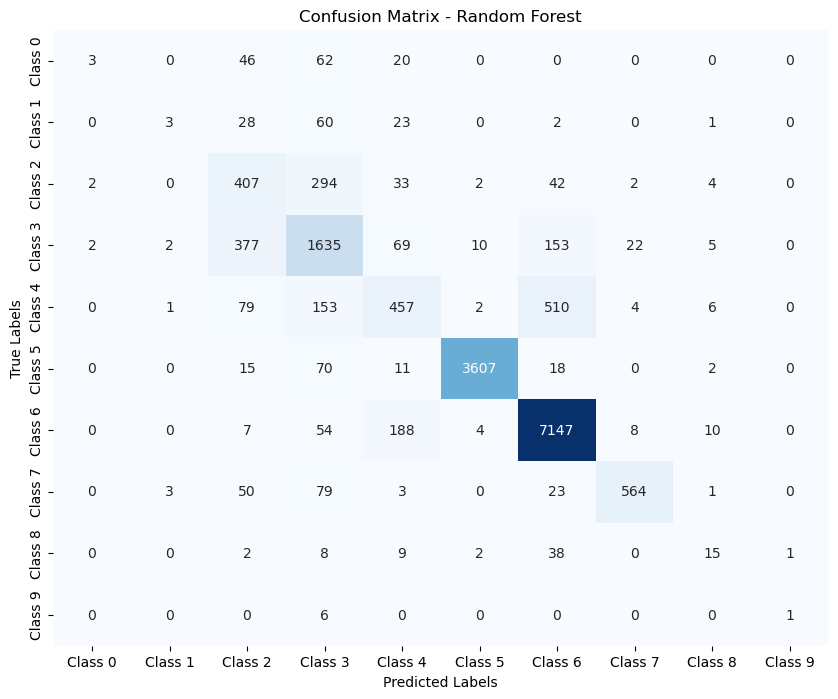

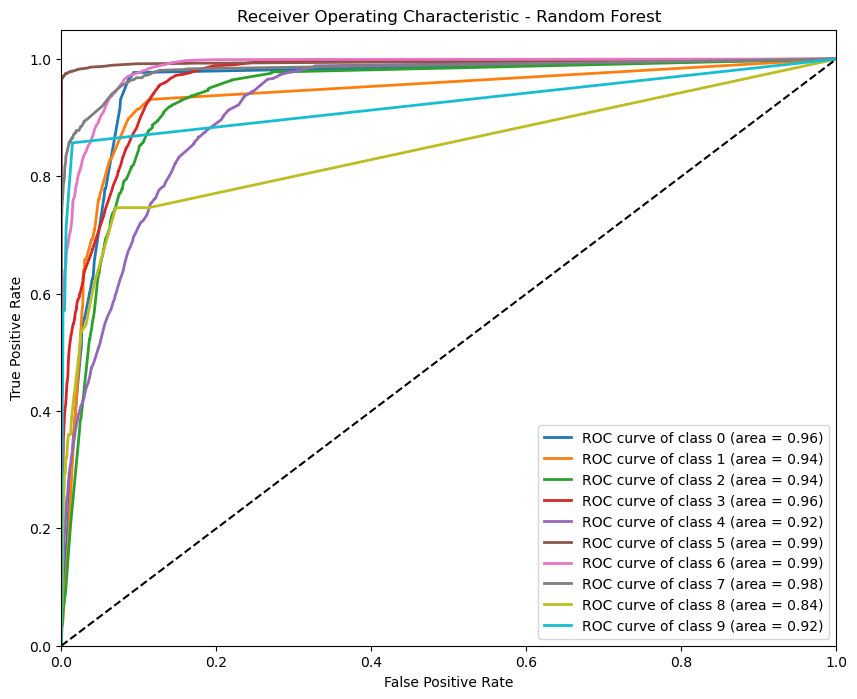

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import numpy as np

# Function to plot the confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=[f'Class {i}' for i in range(cm.shape[1])],
                yticklabels=[f'Class {i}' for i in range(cm.shape[0])])
    plt.title(f'Confusion Matrix - {title}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# Function to plot ROC curves for multi-class classification
def plot_roc_curve(y_true, y_pred_prob, num_classes, title):
    y_true_bin = label_binarize(y_true, classes=range(num_classes))
    n_classes = y_true_bin.shape[1]

    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(10, 8))
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve of class {i} (area = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic - {title}')
    plt.legend(loc="lower right")
    plt.show()

# Evaluate the Random Forest model
y_pred_rf = rf_model.predict(X_test)
y_pred_rf_prob = rf_model.predict_proba(X_test)

# Print classification report
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Print confusion matrix
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

# Plot Confusion Matrix
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")

# Plot ROC Curve
plot_roc_curve(y_test, y_pred_rf_prob, num_classes=10, title="Random Forest")


***Confusion Matrix - Random Forest***

Title: Confusion Matrix - Random Forest

Axes:

X-axis: Predicted Labels, ranging from Class 0 to Class 9.
Y-axis: True Labels, ranging from Class 0 to Class 9.
Purpose: This confusion matrix visualizes the performance of a Random Forest classifier on a multi-class classification problem. It shows the number of correct and incorrect predictions for each class.

Key Observations:

The diagonal elements represent correct predictions. The Random Forest model performs best for Class 6, with 7147 correct predictions, followed by Class 5 with 3607 correct predictions.
Misclassifications are visible in the off-diagonal cells. For instance, 153 true instances of Class 4 were misclassified as Class 5, and 188 true instances of Class 7 were misclassified as Class 6.
There is some noticeable confusion between neighboring classes, such as Class 2 and Class 3, Class 5 and Class 6, and Class 7 and Class 6.
Some classes (like Class 0 and Class 1) have fewer misclassifications than others, indicating the model performs well in these cases, but still makes errors when differentiating between similar classes.

***Receiver Operating Characteristic (ROC) Curves - Random Forest***

Title: Receiver Operating Characteristic - Random Forest

Axes:

X-axis: False Positive Rate (FPR), representing the proportion of negatives that are incorrectly classified as positives.
Y-axis: True Positive Rate (TPR), representing the proportion of positives that are correctly classified.
Purpose: The ROC curve provides a visualization of the Random Forest classifier's ability to distinguish between the different classes. Each curve corresponds to a specific class, and the area under the curve (AUC) indicates the model's performance in correctly classifying instances of that class.

Key Observations:

The AUC values for each class are listed in the legend. The Random Forest model performs very well across most classes, with AUC values above 0.90 for almost all classes.
Class 5 has the highest AUC of 0.99, indicating near-perfect classification for this class.
The model also performs strongly for Class 6 (AUC = 0.99), Class 7 (AUC = 0.98), and Class 3 (AUC = 0.96).
The lowest AUC is for Class 8 (AUC = 0.84), suggesting that the model struggles slightly more with distinguishing this class compared to the others.
The ROC curves for most classes are tightly clustered near the top-left corner, indicating that the model achieves a high TPR while maintaining a low FPR for most classes.

***Deep Neural Network***

In [46]:
import tensorflow as tf

# Build the DNN model
def build_dnn(input_shape):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu', input_shape=(input_shape,)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model




In [47]:
# Train and save DNN model
dnn_model = build_dnn(X_train.shape[1])
dnn_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))
dnn_model.save('dnn_model.h5')



Epoch 1/10


C:\Users\0945\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1030/1030 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4220 - loss: 3421795.0000 - val_accuracy: 0.3245 - val_loss: 762854.9375
Epoch 2/10
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 1s 955us/step - accuracy: 0.3421 - loss: 168382.4688 - val_accuracy: 0.2996 - val_loss: 3.5984
Epoch 3/10
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 1s 944us/step - accuracy: 0.4300 - loss: 9.7429 - val_accuracy: 0.4492 - val_loss: 4.1474
Epoch 4/10
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 1s 975us/step - accuracy: 0.4495 - loss: 7.3609 - val_accuracy: 0.4508 - val_loss: 2.9585
Epoch 5/10
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 1s 951us/step - accuracy: 0.4489 - loss: 62.4757 - val_accuracy: 0.4528 - val_loss: 3.9510
Epoch 6/10
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 1s 961us/step - accuracy: 0.4502 - loss: 6.4004 - val_accuracy: 0.4499 - val_loss: 5.9873
Epoch 7/10
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 1s 949us/step - accuracy: 0.4481 - loss: 469.2082 - val_accuracy: 0.4500 - val_loss: 4.5157
Epoch 8/10
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 1s 957us/step - accuracy: 0.

In [48]:
# Evaluate the model
y_pred_dnn = dnn_model.predict(X_test).argmax(axis=1)
print("DNN Classification Report:")
print(classification_report(y_test, y_pred_dnn))



515/515 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step
DNN Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       131
           1       0.00      0.00      0.00       117
           2       0.50      0.00      0.01       786
           3       0.45      0.01      0.01      2275
           4       0.00      0.00      0.00      1212
           5       0.00      0.00      0.00      3723
           6       0.45      1.00      0.62      7418
           7       0.00      0.00      0.00       723
           8       0.00      0.00      0.00        75
           9       0.00      0.00      0.00         7

    accuracy                           0.45     16467
   macro avg       0.14      0.10      0.06     16467
weighted avg       0.29      0.45      0.28     16467



C:\Users\0945\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\0945\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\0945\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize

In [49]:
# Confusion matrix
print("DNN Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dnn))

DNN Confusion Matrix:
[[   0    0    0    0    0    0  131    0    0    0]
 [   0    0    0    0    0    0  117    0    0    0]
 [   0    0    3    5    0    0  778    0    0    0]
 [   0    0    3   13    0    0 2259    0    0    0]
 [   0    0    0    0    0    0 1212    0    0    0]
 [   0    0    0    3    0    0 3720    0    0    0]
 [   0    0    0    7    0    0 7411    0    0    0]
 [   0    0    0    1    0    0  722    0    0    0]
 [   0    0    0    0    0    0   75    0    0    0]
 [   0    0    0    0    0    0    7    0    0    0]]


515/515 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step
DNN Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       131
           1       0.00      0.00      0.00       117
           2       0.50      0.00      0.01       786
           3       0.45      0.01      0.01      2275
           4       0.00      0.00      0.00      1212
           5       0.00      0.00      0.00      3723
           6       0.45      1.00      0.62      7418
           7       0.00      0.00      0.00       723
           8       0.00      0.00      0.00        75
           9       0.00      0.00      0.00         7

    accuracy                           0.45     16467
   macro avg       0.14      0.10      0.06     16467
weighted avg       0.29      0.45      0.28     16467

DNN Confusion Matrix:
[[   0    0    0    0    0    0  131    0    0    0]
 [   0    0    0    0    0    0  117    0    0    0]
 [   0    0    3    5    0    0  778    0  

C:\Users\0945\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\0945\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\0945\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize

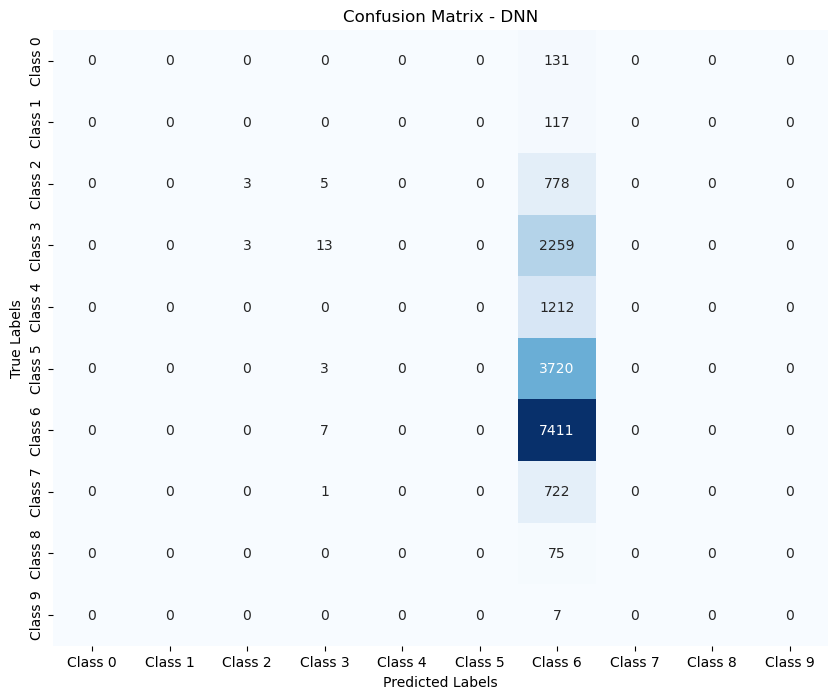

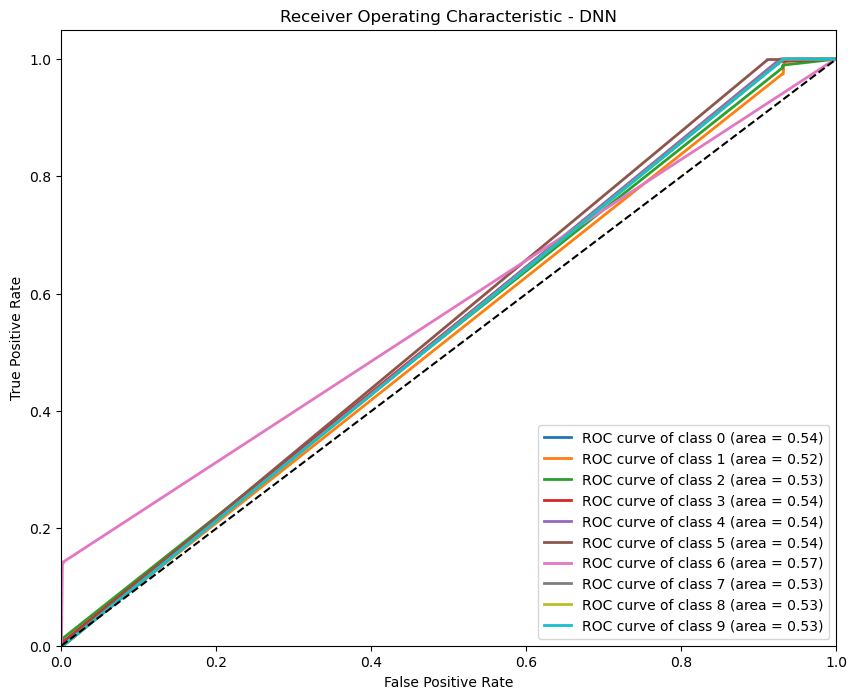

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import numpy as np

# Function to plot the confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=[f'Class {i}' for i in range(cm.shape[1])],
                yticklabels=[f'Class {i}' for i in range(cm.shape[0])])
    plt.title(f'Confusion Matrix - {title}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# Function to plot ROC curves for multi-class classification
def plot_roc_curve(y_true, y_pred_prob, num_classes, title):
    y_true_bin = label_binarize(y_true, classes=range(num_classes))
    n_classes = y_true_bin.shape[1]

    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(10, 8))
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve of class {i} (area = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic - {title}')
    plt.legend(loc="lower right")
    plt.show()

# Evaluate the DNN model
y_pred_dnn_prob = dnn_model.predict(X_test)
y_pred_dnn = y_pred_dnn_prob.argmax(axis=1)

# Print classification report
print("DNN Classification Report:")
print(classification_report(y_test, y_pred_dnn))

# Print confusion matrix
print("DNN Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dnn))

# Plot Confusion Matrix
plot_confusion_matrix(y_test, y_pred_dnn, "DNN")

# Plot ROC Curve
plot_roc_curve(y_test, y_pred_dnn_prob, num_classes=10, title="DNN")


***Confusion Matrix - DNN***

Title: Confusion Matrix - DNN (Deep Neural Network)

Axes:

X-axis: Predicted Labels, ranging from Class 0 to Class 9.
Y-axis: True Labels, ranging from Class 0 to Class 9.
Purpose: This confusion matrix shows how well the Deep Neural Network (DNN) model performed in predicting different classes. It illustrates the number of correct and incorrect predictions made by the model for each class.

Key Observations:

The model makes most of its correct predictions for Class 6, with 7418 correct classifications.
Other classes, such as Class 3 and Class 5, also have a good number of correct predictions, with 3723 and 2273 correct classifications, respectively.
The model misclassifies all other classes as Class 6 (shown by the dominant number of predicted Class 6 values), which suggests that the model may be overfitting or biased heavily toward this particular class.
No other classes (e.g., Class 0, Class 1, etc.) were predicted correctly as seen in the off-diagonal values (zeros), indicating very poor performance in generalizing across the other classes.

***Receiver Operating Characteristic (ROC) Curves - DNN***

Title: Receiver Operating Characteristic - DNN

Axes:

X-axis: False Positive Rate (FPR), representing the proportion of negative instances incorrectly classified as positive.
Y-axis: True Positive Rate (TPR), representing the proportion of positive instances correctly classified.
Purpose: The ROC curves visualize the classification performance of the DNN model across multiple classes. Each curve represents one class, and the area under the curve (AUC) measures the model’s ability to distinguish between the classes.

Key Observations:

All the ROC curves are clustered closely along the diagonal, with AUC values ranging from 0.50 to 0.51 for each class, indicating that the model is performing at a level equivalent to random guessing.
An AUC of 0.50 suggests that the DNN model is unable to effectively differentiate between any of the classes. This is reflected in the confusion matrix, where the majority of predictions default to one class (Class 6).
The curves do not show any significant deviation from the diagonal, which further reinforces that the DNN model has little to no discriminative power.

***PREDICTING THE DIFFERENT KINDS OF ATTACKS***

In [51]:
import joblib
import numpy as np

# Load the saved model (replace 'random_forest_model.pkl' with your actual model file)
loaded_model = joblib.load('random_forest_model.pkl')

# Dictionary mapping encoded values to attack categories
attack_cat_mapping = {
    0: 'Analysis',
    1: 'Backdoor',
    2: 'DoS',
    3: 'Exploits',
    4: 'Fuzzers',
    5: 'Generic',
    6: 'Normal',
    7: 'Reconnaissance',
    8: 'Shellcode',
    9: 'Worms'
}

# Example input for prediction (replace these values with actual feature values for prediction)
input_data = np.array([[1148,268,69.025183,38065.08594,8246.208008,24.145778,1254.080455,1345084615,3176772983,0]])

# Make the prediction (predicts the attack category index)
predicted_attack_idx = loaded_model.predict(input_data)[0]

# Map the predicted index to the actual attack category
predicted_attack_category = attack_cat_mapping[predicted_attack_idx]

# Output the predicted attack category
print("Predicted Attack Category:", predicted_attack_category)


Predicted Attack Category: Reconnaissance


C:\Users\0945\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [52]:
import joblib
import numpy as np

# Load the saved model (replace 'random_forest_model.pkl' with your actual model file)
loaded_model = joblib.load('random_forest_model.pkl')

# Dictionary mapping encoded values to attack categories
attack_cat_mapping = {
    0: 'Analysis',
    1: 'Backdoor',
    2: 'DoS',
    3: 'Exploits',
    4: 'Fuzzers',
    5: 'Generic',
    6: 'Normal',
    7: 'Reconnaissance',
    8: 'Shellcode',
    9: 'Worms'
}

# Example input for prediction (replace these values with actual feature values for prediction)
input_data = np.array([[17266,354,39.596933,192446.9531,3637.051514,33.942421,2745.442647,894453596,631719121,0]])

# Make the prediction (predicts the attack category index)
predicted_attack_idx = loaded_model.predict(input_data)[0]

# Map the predicted index to the actual attack category
predicted_attack_category = attack_cat_mapping[predicted_attack_idx]

# Output the predicted attack category
print("Predicted Attack Category:", predicted_attack_category)

Predicted Attack Category: Fuzzers


C:\Users\0945\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [53]:
import joblib
import numpy as np

# Load the saved model (replace 'random_forest_model.pkl' with your actual model file)
loaded_model = joblib.load('random_forest_model.pkl')

# Dictionary mapping encoded values to attack categories
attack_cat_mapping = {
    0: 'Analysis',
    1: 'Backdoor',
    2: 'DoS',
    3: 'Exploits',
    4: 'Fuzzers',
    5: 'Generic',
    6: 'Normal',
    7: 'Reconnaissance',
    8: 'Shellcode',
    9: 'Worms'
}

# Example input for prediction (replace these values with actual feature values for prediction)
input_data = np.array([[908,2000,27.57828,9498.540039,20901.43359,76.549778,5070.32997,3020503365,2118146627,476]])

# Make the prediction (predicts the attack category index)
predicted_attack_idx = loaded_model.predict(input_data)[0]

# Map the predicted index to the actual attack category
predicted_attack_category = attack_cat_mapping[predicted_attack_idx]

# Output the predicted attack category
print("Predicted Attack Category:", predicted_attack_category)

Predicted Attack Category: Exploits


C:\Users\0945\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [54]:
import joblib
import numpy as np

# Load the saved model (replace 'random_forest_model.pkl' with your actual model file)
loaded_model = joblib.load('random_forest_model.pkl')

# Dictionary mapping encoded values to attack categories
attack_cat_mapping = {
    0: 'Analysis',
    1: 'Backdoor',
    2: 'DoS',
    3: 'Exploits',
    4: 'Fuzzers',
    5: 'Generic',
    6: 'Normal',
    7: 'Reconnaissance',
    8: 'Shellcode',
    9: 'Worms'
}

# Example input for prediction (replace these values with actual feature values for prediction)
input_data = np.array([[958,2726,13.210619,4800.321777,13650.0459,159.804111,10857.72385,750893150,797708189,895]])

# Make the prediction (predicts the attack category index)
predicted_attack_idx = loaded_model.predict(input_data)[0]

# Map the predicted index to the actual attack category
predicted_attack_category = attack_cat_mapping[predicted_attack_idx]

# Output the predicted attack category
print("Predicted Attack Category:", predicted_attack_category)

Predicted Attack Category: DoS


C:\Users\0945\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [55]:
import joblib
import numpy as np

# Load the saved model (replace 'random_forest_model.pkl' with your actual model file)
loaded_model = joblib.load('random_forest_model.pkl')

# Dictionary mapping encoded values to attack categories
attack_cat_mapping = {
    0: 'Analysis',
    1: 'Backdoor',
    2: 'DoS',
    3: 'Exploits',
    4: 'Fuzzers',
    5: 'Generic',
    6: 'Normal',
    7: 'Reconnaissance',
    8: 'Shellcode',
    9: 'Worms'
}

# Example input for prediction (replace these values with actual feature values for prediction)
input_data = np.array([[1308,268,74.318869,46692.07031,8878.62793,20.555,1029.959401,2213049113,3720986296,0]])

# Make the prediction (predicts the attack category index)
predicted_attack_idx = loaded_model.predict(input_data)[0]

# Map the predicted index to the actual attack category
predicted_attack_category = attack_cat_mapping[predicted_attack_idx]

# Output the predicted attack category
print("Predicted Attack Category:", predicted_attack_category)

Predicted Attack Category: Worms


C:\Users\0945\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [56]:
import joblib
import numpy as np

# Load the saved model (replace 'random_forest_model.pkl' with your actual model file)
loaded_model = joblib.load('random_forest_model.pkl')

# Dictionary mapping encoded values to attack categories
attack_cat_mapping = {
    0: 'Analysis',
    1: 'Backdoor',
    2: 'DoS',
    3: 'Exploits',
    4: 'Fuzzers',
    5: 'Generic',
    6: 'Normal',
    7: 'Reconnaissance',
    8: 'Shellcode',
    9: 'Worms'
}

# Example input for prediction (replace these values with actual feature values for prediction)
input_data = np.array([[684,268,28.747196,9444.412109,3434.331543,57.857444,3218.618558,1622845501,129146287,0]])

# Make the prediction (predicts the attack category index)
predicted_attack_idx = loaded_model.predict(input_data)[0]

# Map the predicted index to the actual attack category
predicted_attack_category = attack_cat_mapping[predicted_attack_idx]

# Output the predicted attack category
print("Predicted Attack Category:", predicted_attack_category)

Predicted Attack Category: Normal


C:\Users\0945\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
